# Introduction to Python Data Science

Getting started with IPython and NumPy vectorized execution

These notes were written for students with introductory Computer Science
experience in Python or introductory data science experience using R.
The former may not familiar with common data science tools like
notebooks, data frames, etc., while the latter may not be familiar with
Python. Our goal in this class is to build a common foundation using
data science tools in Python.

If you are coming from R, keep an eye out for special callouts
identifying the equivalent techniques in R. We hope you fill find that
this transition is not as hard as you might expect. In fact, we think
you’ll find that the Python data science ecosystem is very familiar.
That’s not an accident. Python data science tools share inspiration with
their R counterparts (or are even directly modeled on tools available
within R). In some respects, it may be more challenging to transition
from using Python as a general purpose language to using the Python data
science ecosystem the way we will in this class.

Some helpful resources for (re)learning Python, especially in the
contexts of data science:

-   [LabEx Python “cheat sheets”](https://labex.io/python-cheatsheets):
    A concise listing of Python syntax, data structures, and common
    libraries.
-   [Whirlwind Tour of
    Python](https://jakevdp.github.io/WhirlwindTourOfPython/): A quick
    introduction to Python (intended to serve as an introduction to our
    reading \[@vanderplasPythonDataScience2016\])

Why Python (and not R, or some other tool)? That is a complicated and
fraught question. But the short answer is machine learning. Python is
the lingua franca of machine learning, and that is our ultimate focus.

## Working with IPython notebooks

The primary computing environment for our class will be a
Jupyter/IPython notebooks. These are very similar to R Markdown or other
notebook-style computing environments you might have used in other
settings. Compared to writing a stand-alone program or scripts,
notebooks are designed to be interactive computational documents that
combine code, visualizations and narrative text.

A quick orientation:

-   Notebooks combine executable code cells and rich Markdown/LaTeX text
    cells. Use Markdown cells for explanatory text, headings, and
    equations.
-   A typical approach to is to iteratively run and re-run your code
    cells as your develop. Common actions when doing so: Shift+Enter
    (⇧+⏎) runs the current cell and moves to the next; Ctrl+Enter (⌃+⏎)
    runs the cell and stays; Alt/Option+Enter (⎇/⌥+⏎) runs and inserts a
    new cell below.
-   The state of your computation (variables) is maintained in the
    backing “kernel”. This is analogous to the shell/console sessions
    (more formally REPLs) you might have used previously. Restarting the
    kernel clears that state.
-   Your code cells can contain Python code and IPython magic commands,
    e.g., `%run`, which extend Python’s capabilities.

> **Get in the habit of restarting the kernel and re-running from
> top-to-bottom**
>
> A common issue is that your kernel environment, the current state of
> your Python session, can be out of sync with the current code in your
> notebook. Keep in mind, the kernel is an interactive environment that
> has accumulated all of the computations you have performed so far.
> That may or may not be the same as the environment created if you ran
> your notebook from top-to-bottom in a fresh session. To avoid
> problems, get in the habit of restarting your kernel to get a fresh
> session and running your notebook from top-to-bottom to ensure it is
> still a valid and coherent program. Especially make sure you do so
> before submitting any work.

While you can run notebooks locally (and we’re happy to show you how to
do so) the primary computing environment we will use in class is Google
Colab. Colab is cloud-based compute environment that provides the
libraries and computing resources “out of the box” (for free!) and
enables rich forms of collaboration.

## Python Data Science Ecosystem

There is a rich data science ecosystem in Python. Some of the libraries
we will be using include:

-   [NumPy](https://numpy.org/): N-dimensional numerical arrays and
    vectorized operations.
-   [pandas](https://pandas.pydata.org/): Flexible DataFrame data
    structures and I/O for tabular data.
-   [Matplotlib](https://matplotlib.org/): Low-level plotting library
    for producing 2-D figures.
-   [Seaborn](https://seaborn.pydata.org/): High-level statistical
    visualization built on Matplotlib (with some similarities to
    `ggplot2` in R).
-   [SciPy](https://scipy.org/): Scientific computing routines:
    optimization, integration, signal processing, etc.
-   [scikit-learn](https://scikit-learn.org/): General-purpose machine
    learning: classification, regression, clustering, pipelines.
-   [PyTorch](https://pytorch.org/): Widely-used deep learning
    framework.

## “Vector” execution and Numerical Python (NumPy)

The [`numpy` (**Num**erical **Py**thon) package](https://numpy.org/) is
an extensive set of tools for working with N-dimensional *arrays* in
Python. `numpy`, which we will write as NumPy, is at the heart of
efficient data science and scientific computation in Python and is
common building block for many of the other tools we will use.

Similar to R and other data intensive computing environment, NumPy
encourages us to think about our computations in terms of “vector” or
“array” operations, i.e., performing computations across multiple values
instead of using loops. This “vectorized” style of computation and can
be much faster (and more concise) than directly iterating (with `for`
loops, etc.) because we can leverage NumPy’s highly optimized native
implementations (i.e., implemented in C, not Python). Many operations in
R, Matlab, etc. are similarly wrappers around high-performance native
libraries. In this context, we use “vector” in the linear algebra sense
of the term, i.e. a 1-D matrix of values, instead of a description of
magnitude and direction (like you might see in Physics). More generally,
we are aiming for largely “loop-free” implementations, that is all loops
are implicit in the vector operations and thus implemented in native
code.

Let’s get started by importing the relevant package. Here we import all
the types and functions in the `numpy` package with a `np` prefix, i.e.,
make them available to our program as `np.<something>`. Another common
format is `import numpy`, which is shorthand for
`import numpy as numpy`. We typically want to use the prefixed imports
to avoid naming conflicts, i.e., identically named functions from
different packages colliding. Many of the packages we will use in class
have conventions for import naming (like `np` for `numpy`) that we will
try to follow.

In [4]:
# This is the typical import style/prefix. It makes all the NumPy types and functions
# available with a `np` prefix.
import numpy as np

print("NumPy version:", np.__version__)

NumPy version: 2.0.2


Even if you have never used NumPy, vectorized computations are likely
not new. For example, a first implementation of `mean` in Python might
look like:

``` python
def mean(data):
    """Return mean of non-empty sequence data"""
    result = 0
    for val in data:
        # result += ... equivalent to result = result + ...
        result += val
    return result / len(data)
```

Line 1  
`def` is used to define a function, here named `mean` with one
positional argument `data`. The body of function is indented (typically
4 spaces, but any indentation is allowed as long as it is consistent).

Line 4  
A python `for` loop defines a loop variable (here `val`) that is
assigned values from from a loop sequence. Here `data` is likely a
`list`, but any ordered sequence will work. In each iteration the loop
variable is assigned to the next value from the sequence.

Line 7  
Python requires an explicit `return` statement (unlike R which
implicitly returns the value of the last expression in a function),
which terminates execution and “returns” a value to the caller.
Functions without a `return` statement are permitted and will implicitly
return a special value `None`.

A more typical implementation might be:

``` python
def mean(data):
    return sum(data) / len(data)
```

Here the loop inherent to the sum operation is implicit within the `sum`
function, i.e., we would describe it as “vectorized”.

## Vectorization example: Standard deviation

In a more complex example, let’s consider a standard deviation
computation. Here is a typical implementation with an explicit loop. How
can we vectorize this function?

In [5]:
import math

def stddev(data):
    mean = sum(data) / len(data)
    result = 0.0
    for d in data:
        result += (d - mean) ** 2 # ** is the power operator
    return math.sqrt(result / (len(data) - 1))

Here is the corresponding implementation using NumPy. Notice there are
no more `for` loops!

In [6]:
data = np.array([1.0, 2.0, 3.0, 4.0]) # Square brackets create a list literal
np.sqrt(np.sum((data - np.mean(data))**2)/(len(data) - 1))

np.float64(1.2909944487358056)

For our example input, this code performs the following operations:

1.  Creates a 1-D array from a list.

2.  Performs a “reduction”, computing the mean, to produce the scalar
    2.5.

3.  Performs an element-wise subtraction to compute the difference from
    the mean. Note that the scalar argument, the mean, is “broadcasted”
    to be the same size as the vector.

    $$
    \begin{bmatrix} 1.0 \\ 2.0 \\ 3.0 \\ 4.0 \end{bmatrix} - \begin{bmatrix} 2.5 \\ 2.5 \\ 2.5 \\ 2.5 \end{bmatrix}
    $$

4.  Performs an element-wise “squaring” via the `**` operator.

    $$
    \begin{bmatrix} -1.5^2 \\ -0.5^2 \\ 0.5^2 \\ 1.5^2 \end{bmatrix}
    $$

5.  Performs a sum reduction of the intermediate vector, producing the
    scalar 5.

    $$
    2.25 + 0.25 + 0.25 + 2.25
    $$

6.  Performs the division and square root operations over scalar values.

    $$
    \sqrt{\frac{5}{4-1}}
    $$

Let’s summarize the NumPy features we used here:

NumPy array (ndarray)  
Efficient N‑dimensional array type created from Python sequences (e.g.,
`np.array([1.0,2.0,3.0])`) or generated directory by NumPy functions.
`ndarray`s compactly (e.g. contiguously) store data of a uniform type
using native representations (e.g., `double` 64-bit floating point) and
supports vectorized operations.

Vectorized arithmetic  
Element‑wise operations (e.g., `data - np.mean(data)`,
`(data - mean) ** 2`) applied to whole arrays without explicit Python
`for` loops.

Reduction functions  
Aggregation routines like `np.mean` and `np.sum` that compute scalars
from arrays efficiently.

Broadcasting  
Automatic expansion of smaller operands (here the scalar mean) to match
an array’s shape so element‑wise arithmetic works without manual
replication.

Vectorized universal functions (ufuncs)  
Fast, element‑wise functions implemented in C (e.g., `np.sqrt`,
arithmetic operators) that operate on arrays efficiently.

## What makes NumPy useful?

The above implementation is more concise, but also much faster!

In [7]:
def stddev_numpy(data):
    return np.sqrt(np.sum((data - np.mean(data))**2)/(len(data) - 1))

In [8]:
# Create random input data sampled from a normal distribution
data = np.random.normal(size=1000)
data_list = list(data)

# Use the %timeit magic command to benchmark this code by running it several times
%timeit stddev_numpy(data)
%timeit stddev(data_list)

17.2 µs ± 2.68 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
315 µs ± 9.18 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Notice how much faster the NumPy version is! Why is that? Both
implementations are performing the same arithmetic operations. The
difference is that NumPy is doing so with highly optimized native
libraries that are working with the machine’s underlying data
representation, i.e., directly with the underlying double precision
floating point values, compactly stored in continuous memory. In
contrast, the Python implementation is working with Python’s highly
flexible data types and loop structures. For examples, Python lists
store references to the values contiguously, but not the values
themselves. As a result more and less performant memory accesses are
required. Further, numerous operations are required to access the
underlying floating point value to actually perform the calculation.

### So, should I always use NumPy?

If you will operate on large regularly-structured data with uniform type
and are considering writing `for` loops or Python `list`s, etc., ask
yourself whether you can achieve your goal with NumPy arrays instead.
Often the vectorized code is more concise and faster, especially as the
dimensionality increases (i.e., your data is a 2 or 3 or more
dimensional array). But, “always” is a strong word. What we will see is
that “general purpose” Python is often used as the orchestrator, i.e.,
to setup the computation. But the “heavy lifting”, the computationally
intensive portions, are performed with NumPy. And when we do work with
NumPy we want to minimize the use of `for` loops and maximize the use of
vectorized operations.

## A more complex vectorization example, stock market simulation

A [random walk](https://en.wikipedia.org/wiki/Random_walk) is a path
composed of a succession of random steps, e.g. that path of molecule as
it travels in a liquid of gas. Another application of that tool is
simulating the stock market
([inspiration](https://bestinterest.blog/five-charts/)). A common rule
of thumb is that the stock market as a whole will yield 7% a year, but
that simplistic model doesn’t capture the variability in returns
observed in practice. For example, the S&P 500, a large-cap stock index
increased 27% in 2021, but dropped 19.4% in 2022.

An alternate model\[@malkielRandomWalk2015\] (although perhaps not any
more accurate) is that that stock market increases 1% per month on
average, but with a 4.5 percentage point standard deviation, i.e., on
average the market goes up, but there is high variance in those
returns.<span class="column-margin margin-aside">Not investing advice!
Our focus here is the implementation. I don’t make any claims about the
accuracy of this model. Instead, we exploring how to use the
computational tools we are learning about for different purposes.</span>
Let’s leverage our new numerical computing tools to efficiently simulate
the stock market.

Let’s assume we start with a portfolio of \$100 and simulate 20 years,
e.g., 240 months. Each month we observe a random return with a mean of
1% and standard deviation of 4.5% (the random walk). The compounded
product of those returns gives our final portfolio amount. The random
steps in our walk are samples from a distribution of possible returns
(with a mean of 1% and standard deviation of 4.5%). When we sample from
a distribution, we are generating random values with a probability that
matches the target distribution. In our case, most samples will be
around 1%, with some outliers as described by the standard deviation.

One immediate question is what distribution to use. The probability
density function for a Gaussian and Laplace distribution with means of
1.01 (the multiplier for a yield of 1%) and a standard deviation of 4.5%
shown below. The details are not so relevant for this portion of the
course, but the Laplace distribution offers a better model of the “fat”
tails (increased likelihood of outlier events) and asymmetry observed in
the stock market. We can use the [`numpy.random.laplace`
function](https://numpy.org/doc/stable/reference/random/generated/numpy.random.laplace.html#numpy.random.laplace)
to generate random samples from a Laplace distribution. That function is
parameterized by the mean and scale (the latter is derived from the
standard deviation).

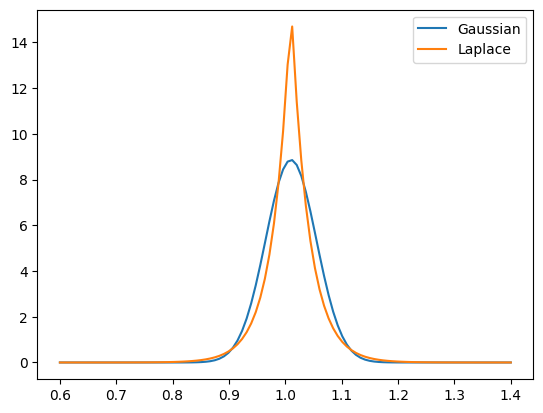

In [9]:
import math
from scipy.stats import norm, laplace
from matplotlib import pyplot as plt
x = np.linspace(0.6, 1.4, 100)
plt.plot(x, norm.pdf(x, 1.01, 0.045), label="Gaussian")
plt.plot(x, laplace.pdf(x, 1.01, 0.045 / math.sqrt(2)), label="Laplace")
plt.legend()
plt.show()

We are interested in the cumulative product of the monthly returns,
which we can compute with the [`cumprod`
function](https://numpy.org/doc/stable/reference/generated/numpy.cumprod.html#numpy-cumprod),
which as its name suggests computes
$x_1, x_1\cdot x_2, x_1\cdot x_2 \cdot x_3,...$. We will start with a
single simulation:

In [12]:
import math # To use the sqrt function

# Initial portfolio
initial = 100

# Model parameters
mean = 0.01
std = 0.045
scale = std / math.sqrt(2) # Scale parameter for Laplace distribution

# Compute cumulative returns by month
steps = np.random.laplace(1+mean, scale, 240)
returns = np.cumprod(steps)
portfolio = initial * returns

In [11]:
steps

array([1.06085544, 1.01660092, 1.01464459, 1.04448491, 0.99156788,
       1.04084133, 0.99237213, 1.00696743, 0.99875899, 0.94051912,
       0.99145854, 1.01388857, 1.06469622, 1.01263859, 1.0433822 ,
       0.96494742, 1.04815782, 0.93976452, 1.01121465, 0.91950774,
       0.77389421, 1.1695993 , 1.04278187, 1.05794909, 1.01438935,
       1.02636723, 1.04290143, 1.09134662, 1.03911116, 1.01509703,
       1.01761785, 1.03560957, 0.99473915, 0.9856167 , 1.01496615,
       1.03153291, 1.05244012, 0.99561822, 1.0524139 , 0.97677677,
       0.99271058, 1.05843176, 1.01286907, 0.97317318, 1.00042653,
       1.01188955, 1.02890618, 0.97086022, 1.00776059, 0.97318493,
       1.01974469, 0.99778259, 1.01852887, 1.02488311, 1.00739019,
       1.00626833, 1.09549144, 1.03737337, 1.00446634, 1.05051612,
       1.11050701, 1.05062898, 1.03159752, 0.86397271, 1.01711824,
       1.01037899, 1.0924607 , 1.00302356, 1.00760113, 1.03198136,
       1.02547283, 1.02619475, 0.94352533, 0.96555454, 1.05233

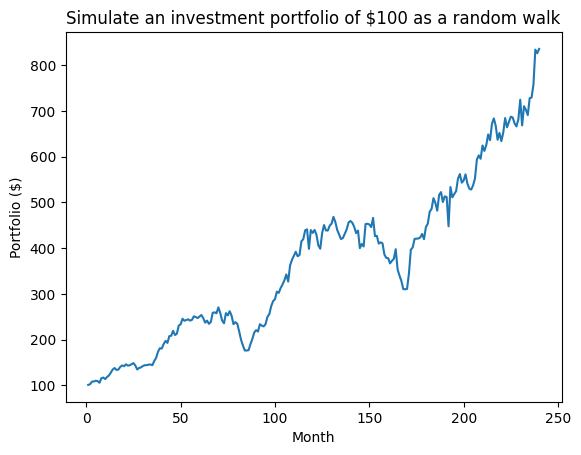

In [13]:
plt.plot(range(1, len(portfolio)+1), portfolio)
plt.xlabel("Month")
plt.ylabel("Portfolio ($)")
plt.title(f"Simulate an investment portfolio of ${initial} as a random walk")
plt.show()

The above just performed a single simulation. We typically want to
perform the walk many times, e.g., 5000, to get a distribution of
outcomes. Here is where the vectorized approach can be particularly
helpful (for both conciseness and performance). We can think of 5000
random walks of length 240 as working with a 2-D array with 5000 rows
and 240 columns where each row is a different walk and each column is a
month (a step in our walk). To simplify our approach we will just focus
on the total yield, i.e., compute the product of the returns (with
[`np.prod`](https://numpy.org/doc/stable/reference/generated/numpy.prod.html#numpy.prod))
not the cumulative product.

In [16]:
num_sim = 5000

# Providing a tuple for size to laplace produces num_simx240 values. We then compute
# the product along axis=1, i.e., along the rows, to get the final return.
# TODO
steps = np.random.laplace(1+mean, scale, (num_sim, 240))

returns = np.prod(steps, axis=1)
portfolios = initial * returns

We observe a broad distribution of returns including a subset of
simulations that underperformed the simplistic model of 7% return per
year (shown with the dashed line).

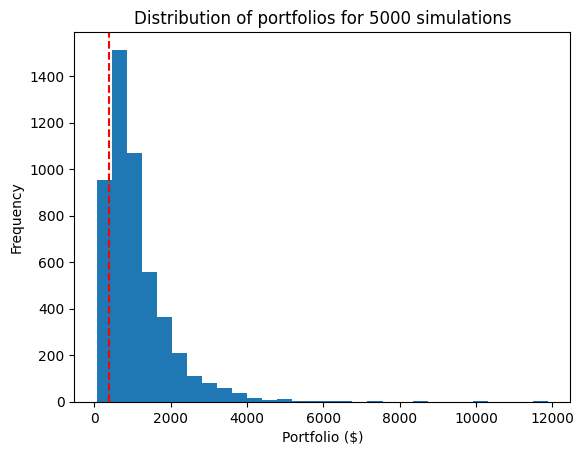

In [17]:
plt.hist(portfolios, bins=30)
plt.axvline(x=initial * (1.07 ** 20), color='r', linestyle='--')
plt.xlabel("Portfolio ($)")
plt.ylabel("Frequency")
plt.title("Distribution of portfolios for " + str(num_sim) + " simulations")
plt.show()

What is different about this version? Notice that we provide a length 2
tuple to `np.random.laplace`. <span class="column-margin margin-aside">A
Python tuple is a heterogenous sequence of fixed length.</span> This
creates a 2-D array of size `{python} num_sim`×240. We can access the
size tuple of a NumPy array with the `shape` attribute. The dimensions
correspond to the indices in `shape`, i.e., dimension 0 is
`{python} num_sim`, dimension 1 is `{python} 240` and so on.

In [ ]:
steps.shape

We also added an `axis` argument to the `np.prod` reduction. By default,
reductions like `prod` are performed “across” the entire entire array
“flattened” into a 1-D vector. If we only want to reduce across a
specific dimension, e.g., just the columns, we specify that with the
`axis` argument. The axes are numbered according to the shape, i.e.,
index 0 of the shape is axis 0, index 1 is axis 1, … If the shape is
`{python} num_sim`×240, summing across axis 1 sums across the 240
dimension. <span class="column-margin margin-aside">`axis` is an example
of a Python optional keyword argument. We don’t need to provide a value
for that argument, and when we do, we do so by name instead of
position</span>

### Including continual investment

We assumed an initial investment of \$100 with no further investments.
However a more realistic scenario might be to simulate regular
contributions, e.g., contributing a fixed amount each month. How would
you extend our previous approach to to model regular contributions?

Let’s start with the underlying expression for a single simulation,
shown below where $r_i$ is the rate of return for month $i$.

$$
\begin{align}
P_{240} &= \sum_{m=1}^{240} \$100 \prod_{i=m}^{240} r_i
\end{align}
$$

Our first instinct might be to convert the product ($\prod$) and sum
($\sum$) operations into `for` loops, as they are iterative computations
over our 240 month time period. As we saw already, we can implement the
product operation as a vectorized operation across a 2-D array. Could we
do so with the sum as well?

Consider the following refactoring of $P_{240}$:

$$
\begin{align*}
P_{240} &= \sum_{m=1}^{240} \$100 \prod_{i=m}^{240} r_i \\
        &= \$100 \sum_{m=1}^{240} \prod_{i=m}^{240} r_i \\
        &= \$100 (\prod_{i=1}^{240} r_i + \prod_{i=2}^{240} r_i + ... + r_{240}) \\
        &= \$100 (r_{240} + (r_{240}\cdot r_{239}) + ... \prod_{i=1}^{240} r_i) \\
        &= \$100 (r_1 + (r_1\cdot r_2) + ... \prod_{i=1}^{240} r_i)
\end{align*}
$$

The sequence $r_1, (r_1\cdot r_2), ..., \prod_{i=1}^{240} r_i$ is the
cumulative product! That is the right hand side of the last expression
is the sum of the cumulative product of the monthly returns! The
corresponding vectorized implementation would be:

In [18]:
returns = np.cumprod(np.random.laplace(1+mean, scale, (num_sim,240)), axis = 1)
portfolios_monthly = initial * np.sum(returns, axis=1)


We can then plot the distribution of our portfolios with continual
investment. That continual investment makes a big difference!

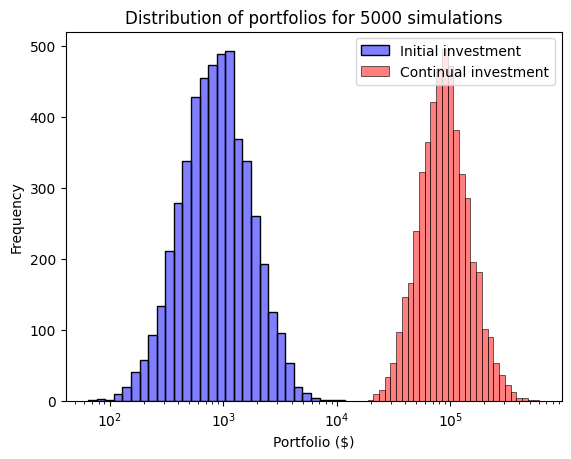

In [19]:
import seaborn as sns
sns.histplot(portfolios, bins=30, log_scale=True, alpha=0.5, label="Initial investment", color="blue")
sns.histplot(portfolios_monthly, bins=30, log_scale=True, alpha=0.5, label="Continual investment", color="red")
plt.xlabel("Portfolio ($)")
plt.ylabel("Frequency")
plt.title("Distribution of portfolios for " + str(num_sim) + " simulations")
plt.legend()
plt.show()

## A note about vectorization and Python data science tools, more generally

This “vectorized” approach is very powerful. And not as unfamiliar as it
might seem. If you have ever created a formula in Excel in a single cell
and then copied it to an entire column, then you have performed a
“vectorized” computation. As we described earlier, the benefits of this
approach are performance and programmer efficiency. We just implemented
some very sophisticated computations very concisely and efficiency. One
challenge is the size of these libraries. NumPy and the other libraries
we will use have 1000s of functions. We can’t possible know every
feature that might be available. Instead we will seek to build our
understanding of how to best approach data science problems to
effectively use these tools (something not necessarily specific to
Python), and the sense of what kind of functions should exist (and
where/how to start looking for them). In the readings, in class and in
these notes, aim to identify those “cross-cutting” approaches (or
patterns) that you can apply broadly. With an appropriate approach in
mind you can then use the documentation, online search, GenAI, etc. to
efficiently find the specific functions/syntax you need.